# Classificação de Vinhos

Utilizando modelos de aprendizagem com Random Florest, Gradiente Descendente Estocástico e SVM


In [2]:
import pandas as pd
import numpy as np
import sklearn

## Carregando o conjunto de dados

Os dois conjuntos de dados estão relacionados a variantes de vinho tinto e vinho branco português. Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não balanceadas (por exemplo, há muito mais vinhos normais do que excelentes ou ruins).
Attribute Information:

Atributos:

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

Disponível em: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [32]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
#data = pd.read_csv('winequality-white.csv', delimiter=';')

## Análise inicial dos dados

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Verificando a correlação entre as colunas

In [14]:
col_list = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for x in col_list:
    corr =data[x].corr(data['quality'])
    print (x, corr)

fixed acidity 0.12405164911322425
volatile acidity -0.39055778026400717
citric acid 0.22637251431804145
residual sugar 0.013731637340066266
chlorides -0.12890655993005273
free sulfur dioxide -0.05065605724427635
total sulfur dioxide -0.18510028892653782
density -0.1749192277833501
pH -0.05773139120538212
sulphates 0.2513970790692613
alcohol 0.476166324001136


# Visualizando o conjunto de dados

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlação entre as colunas

Text(0.5, 1.0, 'Correlação entre os atributos')

<Figure size 432x288 with 0 Axes>

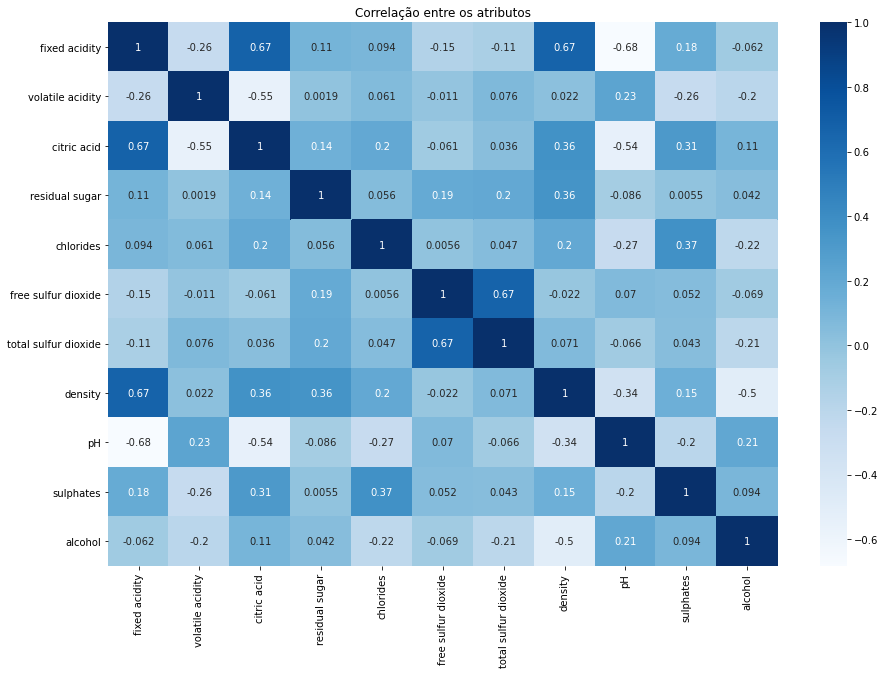

In [31]:
corr = data.corr()
fig = plt.figure()
fig, ax = plt.subplots(figsize =(15,10))
g = sns.heatmap(corr, ax=ax, cmap=plt.cm.Blues, annot=True)
ax.set_title('Correlação entre os atributos')

### acidez fixa

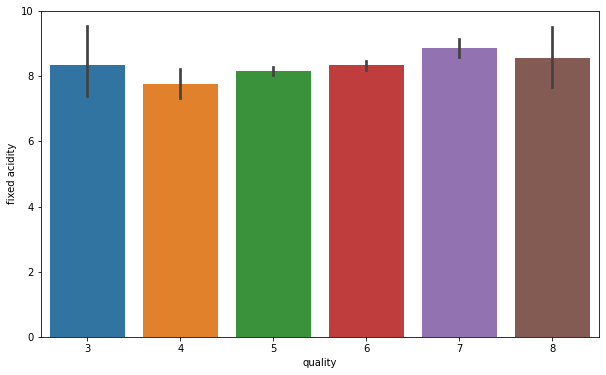

In [18]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='fixed acidity', data=data)

### acidez volátil

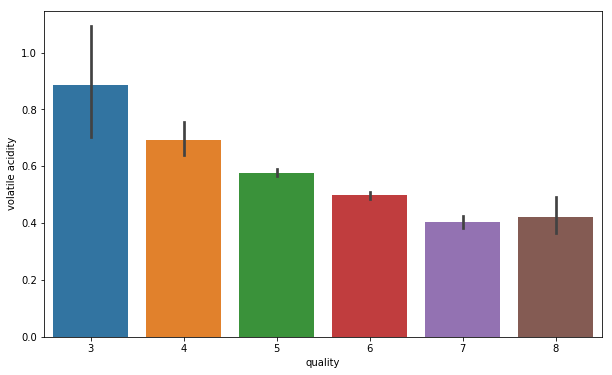

In [13]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=data)

### acidez cítrica

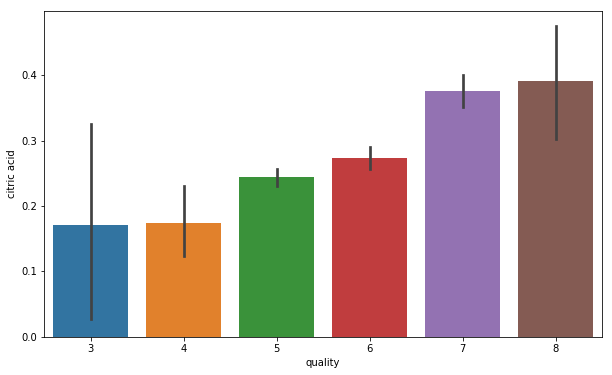

In [14]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', data=data)

### açúcar residual

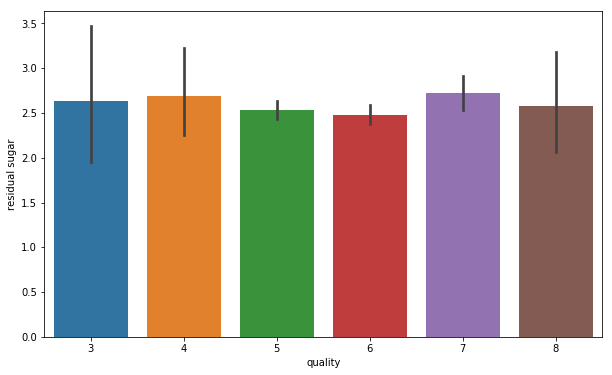

In [15]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', data=data)

### cloretos

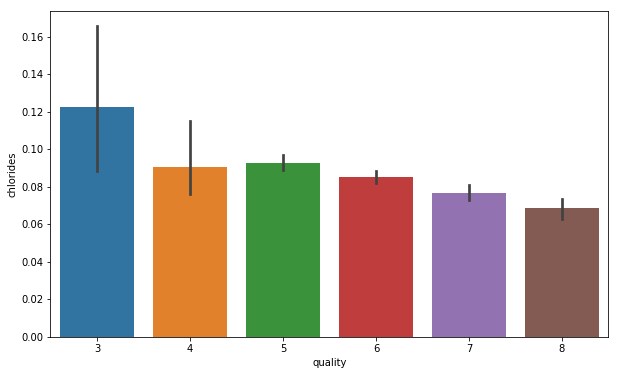

In [16]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', data=data)

### dióxido de enxofre livre

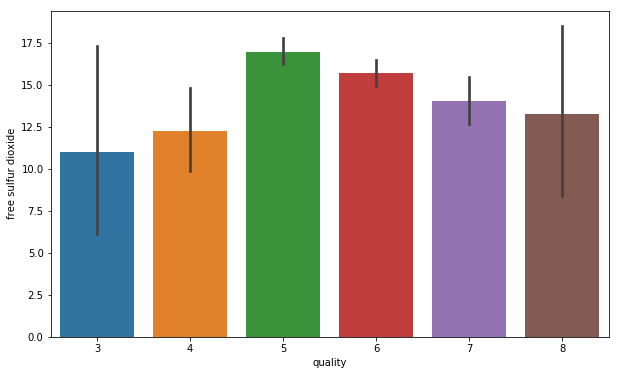

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=data)

### dióxido de enxofre total

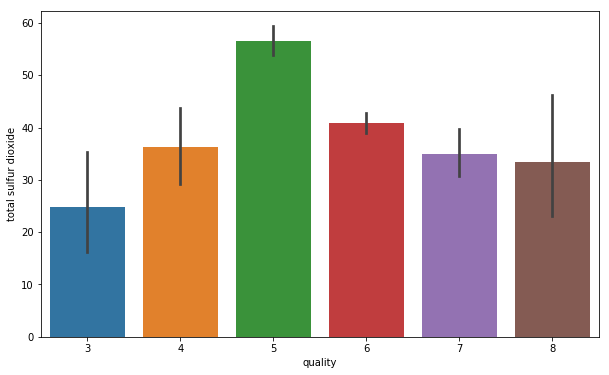

In [18]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=data)

### sulfatos

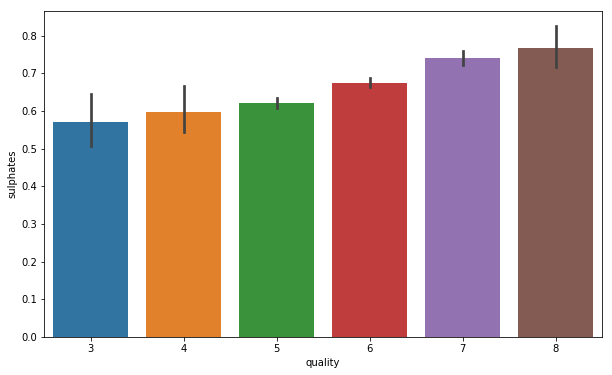

In [19]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', data=data)

### álcool

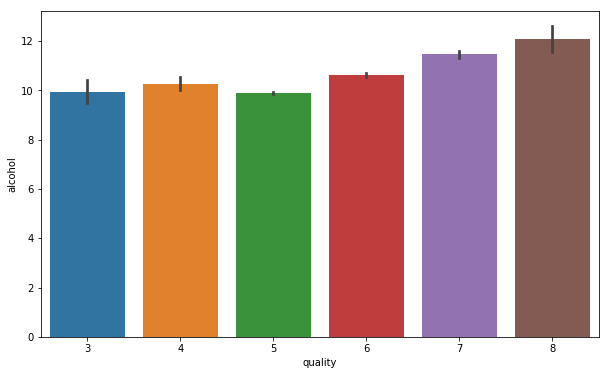

In [20]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=data)

## Criando o modelo de treinamento

Fazendo uma classificação binária para a variável de destino

Dividindo a qualidade do vinho como boa ou ruim com base em um limite

In [19]:
bins =(2, 6, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins=bins, labels=group_names)

In [20]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
X = data.drop(columns='quality', axis=0)
y = data['quality']

## Dividindo o conjunto de dados em treinamento e teste


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


## Padronizando a escala de features

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Classificação com Random Florest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)

from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         bad       0.90      0.97      0.93       273
        good       0.71      0.36      0.48        47

    accuracy                           0.88       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.87      0.88      0.87       320



## Classificação com Gradiente Descendente Estocástico

In [27]:
from sklearn.linear_model import SGDClassifier
sgd =SGDClassifier(penalty='None')
sgd.fit(X_train, y_train)
y_pred =sgd.predict(X_test)

print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         bad       0.91      0.91      0.91       273
        good       0.48      0.49      0.48        47

    accuracy                           0.85       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.85      0.85      0.85       320



## Classificação com SVM

In [28]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.88      0.98      0.93       273
        good       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

